## Config

In [5]:
# change to raw data file
INPUT_DATA_PATH = "../../data/raw/Huurverhoging_woningen__regio_12122024_133111.csv"
INPUT_SHAPEFILE_PATH = "../../data/gemeente_shapefiles/gemeente_shapefile.shp"
INPUT_SHAPEFILE_PATH2 = "../../data/gemeente_shapefiles/GRS_1000_PROV_NL_V.shp"

# set true or false
SAVE_OUTPUT = True
# change to filename
OUTPUT_DATA_PATH = "../../data/processed/huurverhoging.csv"

In [6]:
import numpy as np
import pandas as pd
import geopandas as gpd

## Load data

In [7]:
# load data
df = pd.read_csv(INPUT_DATA_PATH, sep = ',')
gdf = gpd.read_file(INPUT_SHAPEFILE_PATH, sep = ';')
gdf_pc = gpd.read_file(INPUT_SHAPEFILE_PATH2, sep = ';')

In [8]:
gdf_pc = gdf_pc.to_crs("EPSG:4326")
gdf = gdf.to_crs("EPSG:4326")

<Axes: >

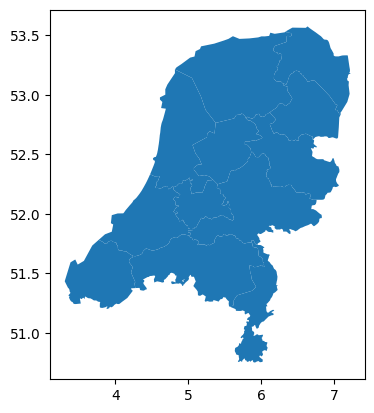

In [9]:
gdf_pc.plot()

In [10]:
gdf_pc

,OBJECTID,PROVINCIEN,PROV_CODE,SHAPE_AREA,SHAPE_LEN,geometry
0,1,Drenthe,22,2.681828e+09,256068.158565,"POLYGON ((6.50931 53.19905, 6.51339 53.19694, ..."
1,2,Flevoland,24,2.413784e+09,236399.542975,"POLYGON ((5.78966 52.80461, 5.79052 52.80444, ..."
2,3,Fryslân,21,5.752659e+09,372906.901681,"POLYGON ((6.35347 53.52219, 6.35526 53.52214, ..."
3,4,Gelderland,25,5.134151e+09,503602.034611,"POLYGON ((5.94054 52.47734, 5.96029 52.47668, ..."
4,5,Groningen,20,2.955313e+09,299249.614826,"POLYGON ((6.64833 53.57007, 6.66743 53.56061, ..."
5,6,Limburg,31,2.207753e+09,419141.407850,"POLYGON ((5.93573 51.74145, 5.93723 51.74141, ..."
6,7,Noord-Brabant,30,5.083624e+09,466209.109788,"POLYGON ((5.53497 51.81662, 5.53840 51.81630, ..."
7,8,Noord-Holland,27,4.092688e+09,380179.016742,"POLYGON ((5.37726 52.76481, 5.36115 52.67573, ..."
8,9,Overijssel,23,3.422124e+09,380489.409371,"POLYGON ((6.13677 52.83899, 6.16976 52.81660, ..."
9,10,Utrecht,26,1.559616e+09,261524.261576,"POLYGON ((5.02361 52.28204, 5.02697 52.28185, ..."


## Data management

In [11]:
df['Huurverhoging inclusief huurharmonisatie'] = (
    df['Huurverhoging inclusief huurharmonisatie']
    .str.replace(',', '.')
    .astype(float)
)

pivot_df = df.pivot_table(
    index="Regio's",                          # Unique regions as rows
    columns='Perioden',                       # Years as columns
    values='Huurverhoging inclusief huurharmonisatie',  # Values
    aggfunc='mean'                            # Use average if there are doubles
).reset_index()



In [12]:
pivot_df

Perioden,Regio's,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Amsterdam,3.1,2.9,2.5,3.3,3.4,3.5,1.1,3.6,2.8,5.2
1,Drenthe (PV),1.8,1.2,1.1,1.1,1.9,3.0,0.6,2.5,1.7,5.8
2,Flevoland (PV),2.3,1.6,1.3,1.9,2.3,2.4,0.2,2.7,1.2,5.5
3,Fryslân (PV),2.5,1.6,1.3,2.3,2.3,2.8,-0.1,2.5,2.4,5.1
4,Gelderland (PV),2.4,1.6,1.1,2.2,2.2,2.4,0.9,2.7,1.4,5.6
5,Groningen (PV),2.8,1.5,1.1,1.9,2.5,3.0,0.5,2.8,1.9,5.0
6,Limburg (PV),2.0,1.6,1.6,1.8,2.5,2.6,0.4,2.7,1.5,5.2
7,Nederland,2.4,1.9,1.6,2.3,2.5,2.9,0.8,3.0,2.0,5.4
8,Noord-Brabant (PV),2.2,1.8,1.5,2.1,2.3,2.8,0.6,2.8,2.0,5.4
9,Noord-Holland (PV),2.6,2.4,2.0,2.8,3.1,3.2,0.8,3.4,2.3,5.3


In [13]:
# Create a mapping dictionary
name_mapping = {
    'Drenthe (PV)': 'Drenthe',
    'Flevoland (PV)': 'Flevoland',
    'Fryslân (PV)': 'Fryslân',
    'Gelderland (PV)': 'Gelderland',
    'Groningen (PV)': 'Groningen',
    'Limburg (PV)': 'Limburg',
    'Noord-Brabant (PV)': 'Noord-Brabant',
    'Noord-Holland (PV)': 'Noord-Holland',
    'Overijssel (PV)': 'Overijssel',
    'Utrecht (PV)': 'Utrecht',
    'Zeeland (PV)': 'Zeeland',
    'Utrecht (gemeente)': 'Utrecht_gm',
    'Zuid-Holland (PV)': 'Zuid-Holland',
    's-Gravenhage (gemeente)' : "'s-Gravenhage"
    }

# Apply the mapping to the 'Regions' column in df
pivot_df["Regio's"] = pivot_df["Regio's"].replace(name_mapping)


In [14]:
drop_list = ['Noord-Nederland (LD)', 'Oost-Nederland (LD)', 'West-Nederland (LD)', 'Zuid-Nederland (LD)', 'Nederland']



In [15]:
# drop regios pivot_df from drop_list
pivot_df = pivot_df[~pivot_df["Regio's"].isin(drop_list)]

In [16]:
pivot_df

Perioden,Regio's,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Amsterdam,3.1,2.9,2.5,3.3,3.4,3.5,1.1,3.6,2.8,5.2
1,Drenthe,1.8,1.2,1.1,1.1,1.9,3.0,0.6,2.5,1.7,5.8
2,Flevoland,2.3,1.6,1.3,1.9,2.3,2.4,0.2,2.7,1.2,5.5
3,Fryslân,2.5,1.6,1.3,2.3,2.3,2.8,-0.1,2.5,2.4,5.1
4,Gelderland,2.4,1.6,1.1,2.2,2.2,2.4,0.9,2.7,1.4,5.6
5,Groningen,2.8,1.5,1.1,1.9,2.5,3.0,0.5,2.8,1.9,5.0
6,Limburg,2.0,1.6,1.6,1.8,2.5,2.6,0.4,2.7,1.5,5.2
8,Noord-Brabant,2.2,1.8,1.5,2.1,2.3,2.8,0.6,2.8,2.0,5.4
9,Noord-Holland,2.6,2.4,2.0,2.8,3.1,3.2,0.8,3.4,2.3,5.3
12,Overijssel,2.2,1.9,1.5,2.2,2.1,2.1,1.4,2.6,2.1,5.7


In [17]:
final = pivot_df.merge(gdf_pc, left_on="Regio's", right_on = 'PROVINCIEN', how = "left")
final.drop(columns = ['OBJECTID',	'PROVINCIEN','PROV_CODE','SHAPE_AREA','SHAPE_LEN'], inplace = True)

In [18]:
final

,Regio's,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,geometry
0,Amsterdam,3.1,2.9,2.5,3.3,3.4,3.5,1.1,3.6,2.8,5.2,None
1,Drenthe,1.8,1.2,1.1,1.1,1.9,3.0,0.6,2.5,1.7,5.8,"POLYGON ((6.50931 53.19905, 6.51339 53.19694, ..."
2,Flevoland,2.3,1.6,1.3,1.9,2.3,2.4,0.2,2.7,1.2,5.5,"POLYGON ((5.78966 52.80461, 5.79052 52.80444, ..."
3,Fryslân,2.5,1.6,1.3,2.3,2.3,2.8,-0.1,2.5,2.4,5.1,"POLYGON ((6.35347 53.52219, 6.35526 53.52214, ..."
4,Gelderland,2.4,1.6,1.1,2.2,2.2,2.4,0.9,2.7,1.4,5.6,"POLYGON ((5.94054 52.47734, 5.96029 52.47668, ..."
5,Groningen,2.8,1.5,1.1,1.9,2.5,3.0,0.5,2.8,1.9,5.0,"POLYGON ((6.64833 53.57007, 6.66743 53.56061, ..."
6,Limburg,2.0,1.6,1.6,1.8,2.5,2.6,0.4,2.7,1.5,5.2,"POLYGON ((5.93573 51.74145, 5.93723 51.74141, ..."
7,Noord-Brabant,2.2,1.8,1.5,2.1,2.3,2.8,0.6,2.8,2.0,5.4,"POLYGON ((5.53497 51.81662, 5.53840 51.81630, ..."
8,Noord-Holland,2.6,2.4,2.0,2.8,3.1,3.2,0.8,3.4,2.3,5.3,"POLYGON ((5.37726 52.76481, 5.36115 52.67573, ..."
9,Overijssel,2.2,1.9,1.5,2.2,2.1,2.1,1.4,2.6,2.1,5.7,"POLYGON ((6.13677 52.83899, 6.16976 52.81660, ..."


In [19]:
final.loc[final["Regio's"] == 'Utrecht_gm', 'geometry'] = (gdf[gdf['gm_naam'] == 'Utrecht'].geometry.values[0])
final.loc[final["Regio's"] == "'s-Gravenhage", 'geometry'] = (gdf[gdf['gm_naam'] == "'s-Gravenhage"].geometry.values[0])
final.loc[final["Regio's"] == 'Rotterdam', 'geometry'] = (gdf[gdf['gm_naam'] == 'Rotterdam'].geometry.values[0])
final.loc[final["Regio's"] == 'Amsterdam', 'geometry'] = (gdf[gdf['gm_naam'] == 'Amsterdam'].geometry.values[0])
final.rename(columns = {"Regio's": "Provincie"}, inplace = True)

In [20]:
final_gdf = gpd.GeoDataFrame(final, geometry='geometry')
gdf = gpd.GeoDataFrame(gdf, geometry='geometry')
final_gdf = final_gdf.to_crs("EPSG:4326")
gdf = gdf.to_crs("EPSG:4326")


In [21]:
gdf

,gm_code,gm_naam,geometry
0,GM0003,Appingedam,"POLYGON ((6.80583 53.31703, 6.80588 53.31704, ..."
1,GM0010,Delfzijl,"MULTIPOLYGON (((7.07833 53.26658, 7.07826 53.2..."
2,GM0014,Groningen,"POLYGON ((6.48047 53.24551, 6.48050 53.24579, ..."
3,GM0024,Loppersum,"POLYGON ((6.73921 53.38812, 6.73925 53.38815, ..."
4,GM0034,Almere,"MULTIPOLYGON (((5.21106 52.33159, 5.21106 52.3..."
...,...,...,...
350,GM1963,Hoeksche Waard,"MULTIPOLYGON (((4.57231 51.70007, 4.57053 51.6..."
351,GM1966,Het Hogeland,"MULTIPOLYGON (((6.29052 53.33942, 6.29052 53.3..."
352,GM1969,Westerkwartier,"POLYGON ((6.23175 53.25595, 6.23176 53.25599, ..."
353,GM1970,Noardeast-Fryslân,"MULTIPOLYGON (((6.17582 53.34599, 6.17582 53.3..."


In [22]:
final_gdf

,Provincie,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,geometry
0,Amsterdam,3.1,2.9,2.5,3.3,3.4,3.5,1.1,3.6,2.8,5.2,"MULTIPOLYGON (((4.98068 52.33076, 4.98086 52.3..."
1,Drenthe,1.8,1.2,1.1,1.1,1.9,3.0,0.6,2.5,1.7,5.8,"POLYGON ((6.50931 53.19905, 6.51339 53.19694, ..."
2,Flevoland,2.3,1.6,1.3,1.9,2.3,2.4,0.2,2.7,1.2,5.5,"POLYGON ((5.78966 52.80461, 5.79052 52.80444, ..."
3,Fryslân,2.5,1.6,1.3,2.3,2.3,2.8,-0.1,2.5,2.4,5.1,"POLYGON ((6.35347 53.52219, 6.35526 53.52214, ..."
4,Gelderland,2.4,1.6,1.1,2.2,2.2,2.4,0.9,2.7,1.4,5.6,"POLYGON ((5.94054 52.47734, 5.96029 52.47668, ..."
5,Groningen,2.8,1.5,1.1,1.9,2.5,3.0,0.5,2.8,1.9,5.0,"POLYGON ((6.64833 53.57007, 6.66743 53.56061, ..."
6,Limburg,2.0,1.6,1.6,1.8,2.5,2.6,0.4,2.7,1.5,5.2,"POLYGON ((5.93573 51.74145, 5.93723 51.74141, ..."
7,Noord-Brabant,2.2,1.8,1.5,2.1,2.3,2.8,0.6,2.8,2.0,5.4,"POLYGON ((5.53497 51.81662, 5.53840 51.81630, ..."
8,Noord-Holland,2.6,2.4,2.0,2.8,3.1,3.2,0.8,3.4,2.3,5.3,"POLYGON ((5.37726 52.76481, 5.36115 52.67573, ..."
9,Overijssel,2.2,1.9,1.5,2.2,2.1,2.1,1.4,2.6,2.1,5.7,"POLYGON ((6.13677 52.83899, 6.16976 52.81660, ..."


In [23]:
gdf_with_provincie = gpd.sjoin(gdf, final_gdf[['geometry', "Provincie"]], how='left', predicate='intersects')

In [24]:
gdf_with_provincie[gdf_with_provincie['Provincie'].isna()]

,gm_code,gm_naam,geometry,index_right,Provincie


In [25]:
gdf_with_provincie.rename(columns = {"Regio's": "Provincie"}, inplace = True)
gdf_with_provincie.drop(columns = ['index_right'], inplace = True)

In [26]:
gdf_with_provincie = gdf_with_provincie.merge(final_gdf, on = "Provincie", how = "left")

In [27]:
# remove duplicate gm_naam out gdf_with_provincie, keep first and all other columns
gdf_with_provincie = gdf_with_provincie.drop_duplicates(subset=['gm_naam'], keep='first')

In [28]:
gdf_with_provincie

,gm_code,gm_naam,geometry_x,Provincie,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,geometry_y
0,GM0003,Appingedam,"POLYGON ((6.80583 53.31703, 6.80588 53.31704, ...",Groningen,2.8,1.5,1.1,1.9,2.5,3.0,0.5,2.8,1.9,5.0,"POLYGON ((6.64833 53.57007, 6.66743 53.56061, ..."
1,GM0010,Delfzijl,"MULTIPOLYGON (((7.07833 53.26658, 7.07826 53.2...",Groningen,2.8,1.5,1.1,1.9,2.5,3.0,0.5,2.8,1.9,5.0,"POLYGON ((6.64833 53.57007, 6.66743 53.56061, ..."
2,GM0014,Groningen,"POLYGON ((6.48047 53.24551, 6.48050 53.24579, ...",Drenthe,1.8,1.2,1.1,1.1,1.9,3.0,0.6,2.5,1.7,5.8,"POLYGON ((6.50931 53.19905, 6.51339 53.19694, ..."
4,GM0024,Loppersum,"POLYGON ((6.73921 53.38812, 6.73925 53.38815, ...",Groningen,2.8,1.5,1.1,1.9,2.5,3.0,0.5,2.8,1.9,5.0,"POLYGON ((6.64833 53.57007, 6.66743 53.56061, ..."
5,GM0034,Almere,"MULTIPOLYGON (((5.21106 52.33159, 5.21106 52.3...",Flevoland,2.3,1.6,1.3,1.9,2.3,2.4,0.2,2.7,1.2,5.5,"POLYGON ((5.78966 52.80461, 5.79052 52.80444, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,GM1963,Hoeksche Waard,"MULTIPOLYGON (((4.57231 51.70007, 4.57053 51.6...",Noord-Brabant,2.2,1.8,1.5,2.1,2.3,2.8,0.6,2.8,2.0,5.4,"POLYGON ((5.53497 51.81662, 5.53840 51.81630, ..."
563,GM1966,Het Hogeland,"MULTIPOLYGON (((6.29052 53.33942, 6.29052 53.3...",Fryslân,2.5,1.6,1.3,2.3,2.3,2.8,-0.1,2.5,2.4,5.1,"POLYGON ((6.35347 53.52219, 6.35526 53.52214, ..."
565,GM1969,Westerkwartier,"POLYGON ((6.23175 53.25595, 6.23176 53.25599, ...",Drenthe,1.8,1.2,1.1,1.1,1.9,3.0,0.6,2.5,1.7,5.8,"POLYGON ((6.50931 53.19905, 6.51339 53.19694, ..."
568,GM1970,Noardeast-Fryslân,"MULTIPOLYGON (((6.17582 53.34599, 6.17582 53.3...",Fryslân,2.5,1.6,1.3,2.3,2.3,2.8,-0.1,2.5,2.4,5.1,"POLYGON ((6.35347 53.52219, 6.35526 53.52214, ..."


## Save output

In [29]:
if SAVE_OUTPUT:
    gdf_with_provincie.to_csv(OUTPUT_DATA_PATH, sep = ';', index = False)

## Watermark

In [30]:
!python -m pip install watermark --quiet

In [31]:
%load_ext watermark

In [32]:
%watermark

Last updated: 2025-01-27T11:00:37.556648+01:00

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.17.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [33]:
%watermark --iversions

pandas   : 2.1.2
geopandas: 0.14.0
numpy    : 1.26.1



In [34]:
!lsb_release -a

'lsb_release' is not recognized as an internal or external command,
operable program or batch file.
